In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
tf.__version__

'2.13.0'

In [4]:
# §4.1 留出驗證 (p.78) -- 應該無法執行 --

num_validation_samples = 10000

np.random.shuffle(data)

validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

training_data = data[:]

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# 可調節模型、重新訓練、評估，然後再次調節…
model = get_model()
model.train(np.concatenate([training_data, validation_data]))

test_score = model.evaluate(test_data)


NameError: name 'data' is not defined

In [ ]:
# §4.2 K折交叉驗證 (p.79) -- 應該無法執行 --



In [5]:
# §代碼清單 3-1
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [6]:
# §代碼清單 3-2
import numpy as np

def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [7]:
# §4.3 原始模型 (method 1)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# §代碼清單 3-4
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [ ]:
# §4.3 原始模型  (method 1)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

In [ ]:
# §4.3 原始模型  (method 1)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [23]:
# §4.4 容量更小的模型 (method 2)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [ ]:
# §4.4 容量更小的模型 (method 2)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# §代碼清單 3-8 
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

In [ ]:
# §4.4 容量更小的模型 (method 2)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [27]:
# §4.4 容量更大的模型 (method 3)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [9]:
# §4.4 容量更大的模型 (method 3)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5445 - accuracy: 0.7667 - val_loss: 0.4348 - val_accuracy: 0.8386
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3408 - accuracy: 0.8943 - val_loss: 0.3474 - val_accuracy: 0.8621
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2579 - accuracy: 0.9159 - val_loss: 0.2904 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2109 - accuracy: 0.9291 - val_loss: 0.2779 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1782 - accuracy: 0.9411 - val_loss: 0.2766 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1516 - accuracy: 0.9514 - val_loss: 0.2940 - val_accuracy: 0.8818
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1315 - accuracy: 0.9589 - val_loss: 0.3159 - val_accuracy: 0.8786
Epoch 8/20
30

C:\Users\linea\AppData\Local\Temp\ipykernel_3212\3858980152.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
C:\Users\linea\AppData\Local\Temp\ipykernel_3212\3858980152.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')


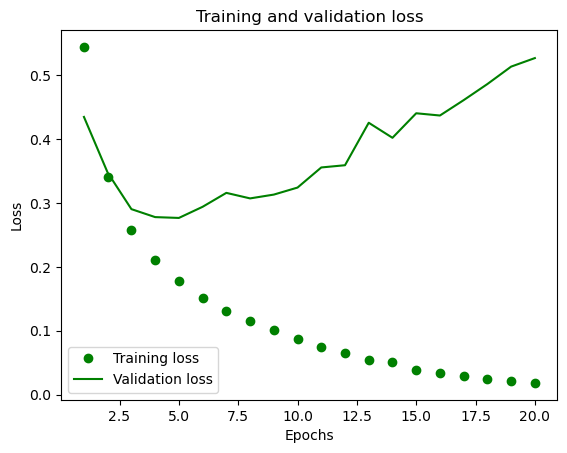

In [10]:
# §4.4 容量更大的模型 (method 3)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [40]:
# §4.6 向模型添加L2權重正則化

from keras import regularizers

model = models.Sequential()

# §4.7 Keras中不同的權重正則化項
# kernel_regularizer=regularizers.l2(0.01)
# kernel_regularizer=regularizers.l1(00.01)
# kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)

model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),
                      activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# §代碼清單 3-4
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [41]:
# §代碼清單 3-8 (§4.6 L2)
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6941 - accuracy: 0.7812 - val_loss: 0.5704 - val_accuracy: 0.8555
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4882 - accuracy: 0.8965 - val_loss: 0.4856 - val_accuracy: 0.8747
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4091 - accuracy: 0.9156 - val_loss: 0.4403 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3638 - accuracy: 0.9291 - val_loss: 0.4323 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3328 - accuracy: 0.9375 - val_loss: 0.4353 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3113 - accuracy: 0.9416 - val_loss: 0.4239 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2947 - accuracy: 0.9481 - val_loss: 0.4077 - val_accuracy: 0.8845
Epoch 8/20
30

/var/folders/mt/4nx5jx_57kvg5fk9x6xt2cth0000gn/T/ipykernel_21830/2345061308.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
/var/folders/mt/4nx5jx_57kvg5fk9x6xt2cth0000gn/T/ipykernel_21830/2345061308.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')


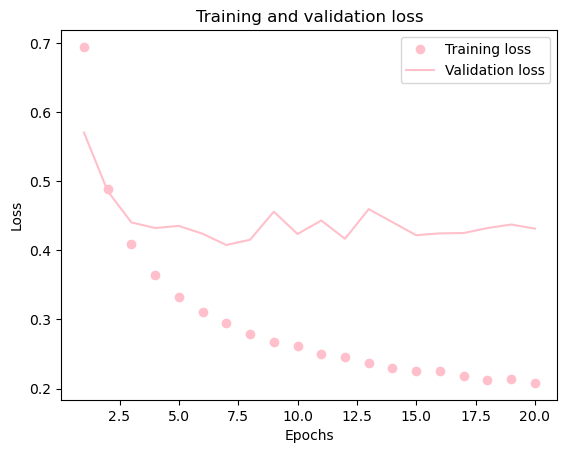

In [42]:
# §代碼清單 3-9 (§4.6 L2)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
# §代碼清單 4-8 向IMDB網路中添加dropout

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [12]:
# §代碼清單 4-8 向IMDB網路中添加dropout -- CONTINUE 01 --
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6389 - accuracy: 0.6239 - val_loss: 0.5428 - val_accuracy: 0.7855
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5311 - accuracy: 0.7565 - val_loss: 0.4509 - val_accuracy: 0.8699
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4532 - accuracy: 0.8218 - val_loss: 0.3856 - val_accuracy: 0.8789
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3943 - accuracy: 0.8577 - val_loss: 0.3478 - val_accuracy: 0.8750
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3434 - accuracy: 0.8787 - val_loss: 0.3061 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3022 - accuracy: 0.8951 - val_loss: 0.2959 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2727 - accuracy: 0.9085 - val_loss: 0.3017 - val_accuracy: 0.8847
Epoch 8/20
30

C:\Users\linea\AppData\Local\Temp\ipykernel_3212\2134820698.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
C:\Users\linea\AppData\Local\Temp\ipykernel_3212\2134820698.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')


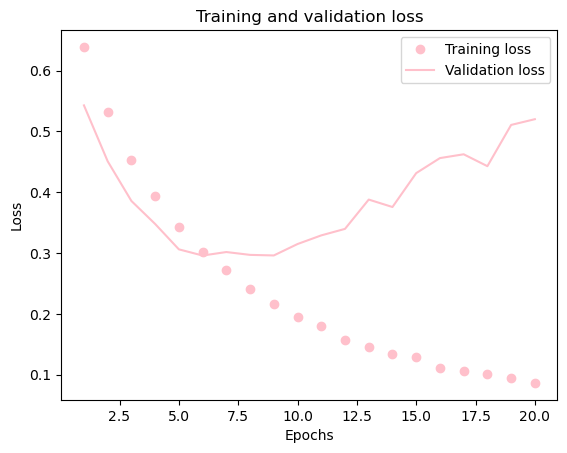

In [13]:
# §代碼清單 4-8 向IMDB網路中添加dropout -- CONTINUE 02 --
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
